# TP Titanic
### Omarjee Abdoullatif
3A Maths Appliqués & Modélisation

# On Importe ce dont on a besoin

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# I/ On importe la dataframe sur laquelle on va travailler et on l'analyse 
On va se contenter d'utiliser des fonctions "basiques" sur le tableau pour le connaître un peu plus

In [3]:
train=pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Note : 
- Sibsp est le le nombre d'enfants avec lequel le sujet a embarqué
- Parch est le nombre de parents avec lequel le sujet a embarqué
- Pclass est la classe socio économique du sujet

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


on remarque que les type ne sont pas pareils , il va falloir évidemment encoder

In [5]:
train[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
print(train.shape)

(891, 12)


le tableau est assez grand mais n'a pas énormément de colonnes de base ( ce qui peut déjà nous égayer pour le choix du réseau de neurones )

### I/1) Correction des données 
on a remarqué qu'il n'y avait pas le même nombre de données pour chaque colonne , on va tenter d'y voir plus clair et éventuellement corriger

In [8]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Concernant l'age :
il en manque mais pas trop , si la répartition est normale on peut opter pour un remplissage des données manquantes par la moyenne par exemple

(array([30., 17., 15.,  9., 29., 64., 67., 70., 83., 62., 51., 40., 35.,
        27., 35., 23., 15.,  9., 11., 11.,  4.,  2.,  3.,  1.,  1.]),
 array([ 0.42  ,  3.6032,  6.7864,  9.9696, 13.1528, 16.336 , 19.5192,
        22.7024, 25.8856, 29.0688, 32.252 , 35.4352, 38.6184, 41.8016,
        44.9848, 48.168 , 51.3512, 54.5344, 57.7176, 60.9008, 64.084 ,
        67.2672, 70.4504, 73.6336, 76.8168, 80.    ]),
 <BarContainer object of 25 artists>)

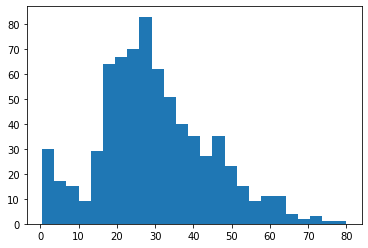

In [10]:
plt.hist(train["Age"],bins=25)        

et c'est le cas , on opte donc donc pour un remplissage par moyenne :

In [11]:
m=train["Age"].mean()
train["Age"].fillna(m,inplace=True)
m

29.69911764705882

#### Concernant la colonne 'Embarked' 
il n'en manque que deux et il n'y en a que quelque possibilités

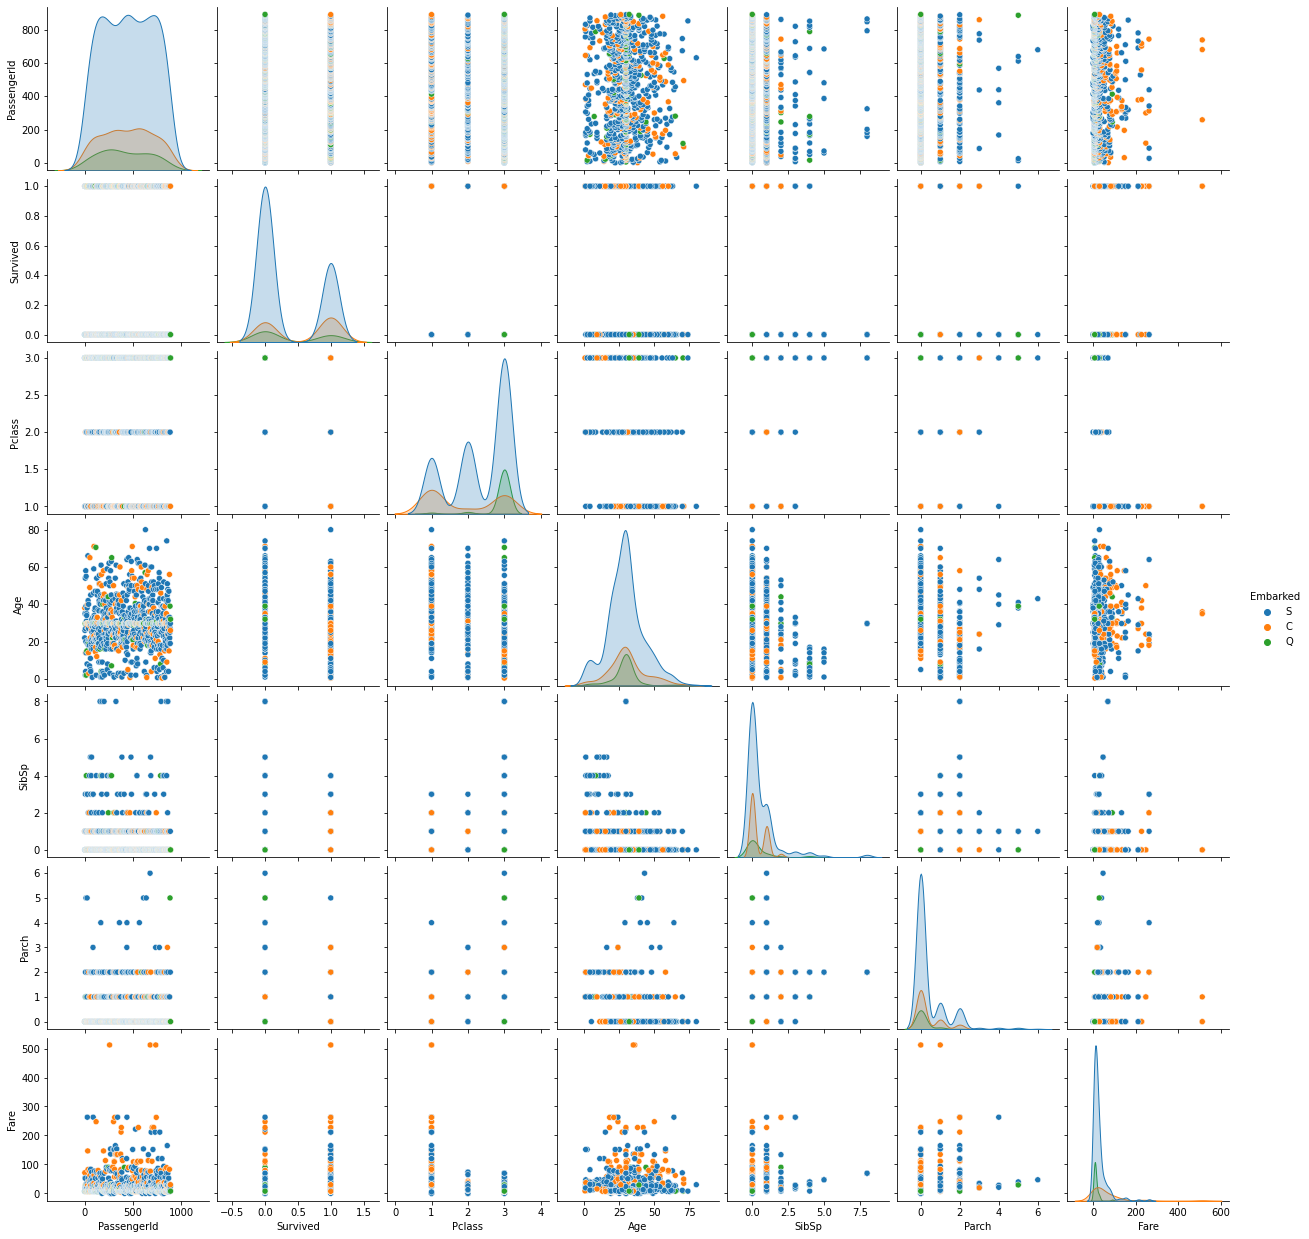

In [12]:
sns.pairplot(train, hue="Embarked")

on remarque qu'il y en a exactement 3 puisque qu'il n'y a que 3 couleurs sur ce paiplot
on en profite pour voir comment elle se comporte par rapport à chaque variable

<Axes: ylabel='Survived'>

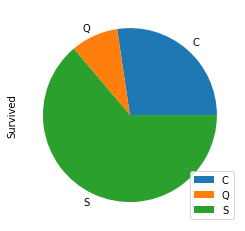

In [13]:
train.groupby(['Embarked']).sum().plot(kind='pie',y='Survived')

On remarque qu'il y a une majorité de "S" 

[Text(0.5, 1.0, 'Survived by Embarked')]

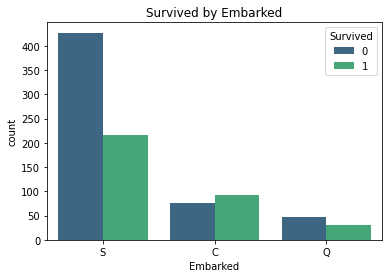

In [14]:
sns.countplot(data=train,x='Embarked',hue='Survived',palette='viridis').set(title='Survived by Embarked')

La variation des cartes d'embarquement en fonction des survivants/non survivants est plutôt régulière , on se choisit donc de remplacer les données manquantes par "S"

In [15]:
train['Embarked'].fillna('S',inplace=True)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


#### Concernant les noms :
Il risque d'y en avoir trop de différents pour analyser quoi que ce soit avec

In [16]:
len(train['Name'].unique())

891

il y a autant de noms différents que de données ... on ne peut quasiment rien faire avec donc on choisit de la supprimer

In [17]:
train.drop('Name',axis=1,inplace=True)
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.000000,0,0,111369,30.0000,C148,C


#### Concernant le numéro de Cabine
il en manque beaucoup trop , il n'y a d'autre choix que de la supprimer

In [18]:
train.drop('Cabin',axis=1,inplace=True)
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.000000,1,0,113803,53.1000,S
4,5,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,S
887,888,1,1,female,19.000000,0,0,112053,30.0000,S
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.000000,0,0,111369,30.0000,C


In [19]:
len(train['Ticket'].unique())

681

il y a ~700 tickets différents sur ~900 données... On ne pourra pas beaucoup travailler dessus , on choisit donc de la supprimer :

In [20]:
train.drop('Ticket',axis=1,inplace=True)
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


#### Concernant les tarifs :
on s'intéresse au nombre de tarifs différents et comment est-ce qu'elles sont réparties

In [21]:
len(train['Fare'].unique())

248

In [22]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

(array([519., 197.,  55.,  47.,  20.,  15.,   7.,   9.,   2.,   0.,   5.,
          4.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   3.]),
 array([  0.      ,  20.493168,  40.986336,  61.479504,  81.972672,
        102.46584 , 122.959008, 143.452176, 163.945344, 184.438512,
        204.93168 , 225.424848, 245.918016, 266.411184, 286.904352,
        307.39752 , 327.890688, 348.383856, 368.877024, 389.370192,
        409.86336 , 430.356528, 450.849696, 471.342864, 491.836032,
        512.3292  ]),
 <BarContainer object of 25 artists>)

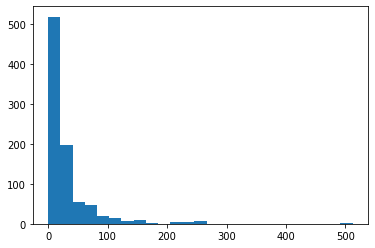

In [23]:
plt.hist(train['Fare'],bins=25)

il y en a 248 plutôt réparties normalement autour de la moyenne .. On a choisit de la garder

### I/2) Encodage et matrice de corrélation

In [24]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
for i in train.columns:
    train[i] = la.fit_transform(train[i])
    
train


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,2,1,28,1,0,18,2
1,1,1,0,0,52,1,0,207,0
2,2,1,2,0,34,0,0,41,2
3,3,1,0,0,48,1,0,189,2
4,4,0,2,1,48,0,0,43,2
...,...,...,...,...,...,...,...,...,...
886,886,0,1,1,35,0,0,85,2
887,887,1,0,0,24,0,0,153,2
888,888,0,2,0,39,1,2,131,2
889,889,1,0,1,34,0,0,153,0


on encode les données 

In [25]:
cor = train.corr()
rela = cor['Survived'].sort_values(ascending = False)
rela

Survived       1.000000
Fare           0.333943
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.026385
Age           -0.062470
Embarked      -0.167675
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

on saisit la matrice de corrélation , on va s'en servir pour déterminer sur quelles données on entraîne le modèle

In [26]:
cor

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033981,-0.065229,-0.001652,-0.006390,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.062470,-0.026385,0.081629,0.333943,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.336631,0.078141,0.018443,-0.724119,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.078523,-0.123164,-0.245489,-0.265389,0.108262
Age,0.033981,-0.062470,-0.336631,0.078523,1.000000,-0.244913,-0.165137,0.122586,-0.023574
SibSp,-0.065229,-0.026385,0.078141,-0.123164,-0.244913,1.000000,0.423338,0.368688,0.065635
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.165137,0.423338,1.000000,0.361243,0.039798
Fare,-0.006390,0.333943,-0.724119,-0.265389,0.122586,0.368688,0.361243,1.000000,-0.158036
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.023574,0.065635,0.039798,-0.158036,1.000000


<Axes: >

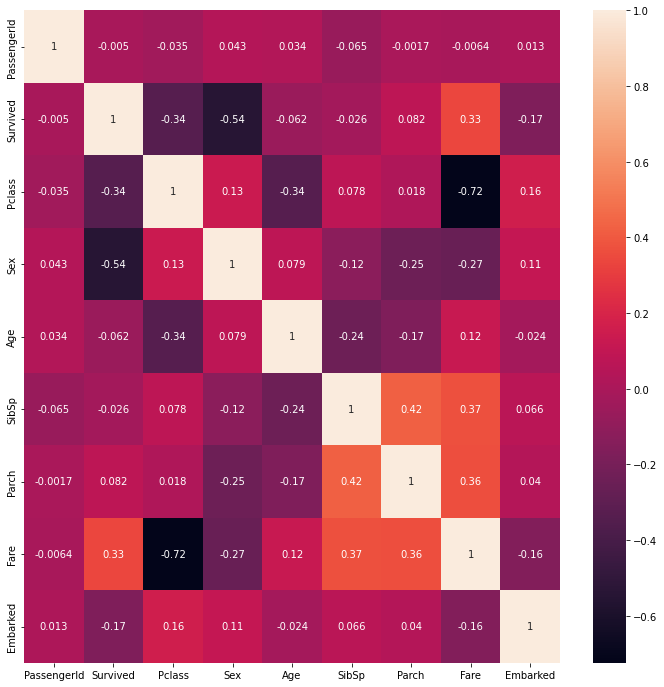

In [27]:
plt.subplots(figsize=(12, 12))
sns.heatmap(cor, annot = True)

grâce à cette heatmap , on a une meilleure vision sur quelles données encodées sont corrélées avec la donnée Survie ou pas ... 
Cependant la manière d'encoder les données en chaînes de caractères reste arbitraire donc on se donne le droit de juger en fonction

In [28]:
carac= []
for i in range(len(rela)):
    if abs(rela[i])>0.3:
        carac.append(rela.index[i])

carac.append('Age')


carac

['Survived', 'Fare', 'Pclass', 'Sex', 'Age']

plus la corrélation entre la donnée Survie et les autres données est proche de 1 en valeur absolue , plus la donnée en question est corrélée 
ici on a choisi de garder celles qui sont au dessus de 0.3
puis on a decidé de repêcher la donnée de l'Age étant donné l'évènement sur lequel on travaille

In [29]:
X=train.copy()[carac]
X.drop('Survived',axis=1,inplace=True)
X

,Fare,Pclass,Sex,Age
0,18,2,1,28
1,207,0,0,52
2,41,2,0,34
3,189,0,0,48
4,43,2,1,48
...,...,...,...,...
886,85,1,1,35
887,153,0,0,24
888,131,2,0,39
889,153,0,1,34


On nomme X les données sur lesquelles on va entraîner notre futur modèle de réseau de neurones

In [30]:
Y=train['Survived']
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

On nomme Y les vraies données avec lesquelles on va la comparer

# II/ Création du modèle
On importe ce dont on a besoin

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2023-11-06 10:48:58.839584: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-06 10:48:58.839745: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### II/1) construction du modèle :

In [32]:
model = keras.Sequential()

model.add(layers.Input(shape=(4,)))

model.add(layers.Dense(3, activation='relu'))

model.add(layers.Dense(1,activation='sigmoid'))

2023-11-06 10:49:02.501538: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-11-06 10:49:02.501695: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-11-06 10:49:02.501795: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (newtown): /proc/driver/nvidia/version does not exist


on nomme "model" notre réseau de neurones
- on met 4 couches en entrée car on a retenu 4 colonne de base 
- on ajoute une fonction d'activation relu pour les données négatives
- enfin une fonction sigmoid parce que la sortie est binaire ( survie ou non survie )

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

On compile le modèle avec
- la fonction d'optimisation adam pour adapter l'apprentissage 
- la fonction de perte binary cossentropy car la sortie est en binaire
- la mesure accuracy pour voir les performances du modèle

In [35]:
model.get_weights()

[array([[ 0.16787803,  0.27361166, -0.6296405 ],
        [ 0.10890889,  0.35374427, -0.7333052 ],
        [-0.01231158, -0.7680664 , -0.6606453 ],
        [ 0.14282537,  0.28291225, -0.09027612]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.76081604],
        [ 0.48987556],
        [-0.15580058]], dtype=float32),
 array([0.], dtype=float32)]

On affiche les poids et les biais du modèle

### II/2) Entraînement du modèle

In [36]:
model.fit(X, Y, epochs=150, batch_size=150, verbose=2)

Epoch 1/150
6/6 - 1s - loss: 0.9495 - accuracy: 0.3805 - 1s/epoch - 169ms/step
Epoch 2/150
6/6 - 0s - loss: 0.7651 - accuracy: 0.4411 - 14ms/epoch - 2ms/step
Epoch 3/150
6/6 - 0s - loss: 0.7637 - accuracy: 0.5690 - 15ms/epoch - 3ms/step
Epoch 4/150
6/6 - 0s - loss: 0.6974 - accuracy: 0.6184 - 17ms/epoch - 3ms/step
Epoch 5/150
6/6 - 0s - loss: 0.6684 - accuracy: 0.6543 - 15ms/epoch - 2ms/step
Epoch 6/150
6/6 - 0s - loss: 0.6434 - accuracy: 0.7441 - 13ms/epoch - 2ms/step
Epoch 7/150
6/6 - 0s - loss: 0.6186 - accuracy: 0.7340 - 13ms/epoch - 2ms/step
Epoch 8/150
6/6 - 0s - loss: 0.6057 - accuracy: 0.6891 - 13ms/epoch - 2ms/step
Epoch 9/150
6/6 - 0s - loss: 0.5968 - accuracy: 0.7160 - 14ms/epoch - 2ms/step
Epoch 10/150
6/6 - 0s - loss: 0.5864 - accuracy: 0.7228 - 12ms/epoch - 2ms/step
Epoch 11/150
6/6 - 0s - loss: 0.5808 - accuracy: 0.7093 - 14ms/epoch - 2ms/step
Epoch 12/150
6/6 - 0s - loss: 0.5769 - accuracy: 0.7071 - 13ms/epoch - 2ms/step
Epoch 13/150
6/6 - 0s - loss: 0.5742 - accuracy: 

On entraîne le modèle , en parcourant 150 fois les données et en mettant à jour les poids après avoir vu 150 données

In [37]:
Ypred=model.predict(X)
Ypred.round()

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

On saisit la prédiction

In [38]:
scores = model.evaluate(X, Y);
accuracy = scores[1]
accuracy

28/28 [==============================] - 1s 4ms/step - loss: 0.5043 - accuracy: 0.7520


0.7519640922546387

On remarque qu'on a 70% de réussite avec ce modèle

In [39]:
tf.math.confusion_matrix(Y,Ypred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[549,   0],
       [342,   0]], dtype=int32)>

# III/ Prédiction sur le fichier Test
on va appliquer les mêmes méthodes de modifications sur le fichier de test pour être cohérent 

In [40]:
test=pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [42]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### III/1) Correction des données
les colonnes qui posent problème ne sont pas les mêmes que le dataframe train

In [43]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [44]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [45]:
test.drop('Cabin',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)
test.drop('Ticket',axis=1,inplace=True)

On supprime les mêmes colonnes que pour le fichier train

(array([11.,  4.,  5.,  5.,  7., 22., 32., 45., 36., 33., 20., 17., 13.,
        16., 14., 13.,  9.,  5.,  9.,  6.,  5.,  3.,  1.,  0.,  1.]),
 array([ 0.17  ,  3.2032,  6.2364,  9.2696, 12.3028, 15.336 , 18.3692,
        21.4024, 24.4356, 27.4688, 30.502 , 33.5352, 36.5684, 39.6016,
        42.6348, 45.668 , 48.7012, 51.7344, 54.7676, 57.8008, 60.834 ,
        63.8672, 66.9004, 69.9336, 72.9668, 76.    ]),
 <BarContainer object of 25 artists>)

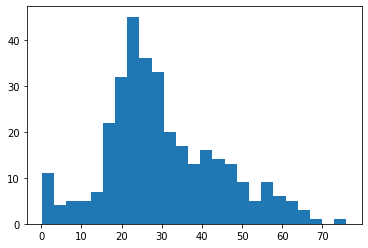

In [46]:
plt.hist(test['Age'],bins=25)

(array([239.,  90.,  28.,  21.,   8.,   2.,   6.,   3.,   2.,   0.,   8.,
          1.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([  0.      ,  20.493168,  40.986336,  61.479504,  81.972672,
        102.46584 , 122.959008, 143.452176, 163.945344, 184.438512,
        204.93168 , 225.424848, 245.918016, 266.411184, 286.904352,
        307.39752 , 327.890688, 348.383856, 368.877024, 389.370192,
        409.86336 , 430.356528, 450.849696, 471.342864, 491.836032,
        512.3292  ]),
 <BarContainer object of 25 artists>)

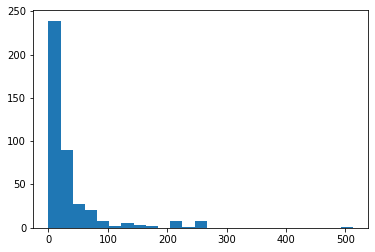

In [47]:
plt.hist(test['Fare'],bins=25)

l'Age et le Tarif sont plutôt réparties normalement , on va donc effectuer un remplissage de données manquantes par la moyenne

In [48]:
m1=test['Age'].mean()
m2=test['Fare'].mean()

test['Age'].fillna(m1,inplace=True)
test['Fare'].fillna(m2,inplace=True)
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.50000,0,0,7.8292,Q
1,893,3,female,47.00000,1,0,7.0000,S
2,894,2,male,62.00000,0,0,9.6875,Q
3,895,3,male,27.00000,0,0,8.6625,S
4,896,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,30.27259,0,0,8.0500,S
414,1306,1,female,39.00000,0,0,108.9000,C
415,1307,3,male,38.50000,0,0,7.2500,S
416,1308,3,male,30.27259,0,0,8.0500,S


In [49]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Les données sont propres , on peut continuer

### III/2) Encodage et saisie
La suite est assez similaire à ce qu'on a fait à train

In [50]:
for i in test.columns:
    test[i] = la.fit_transform(test[i])
    
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,45,0,0,24,1
1,1,2,0,61,1,0,5,2
2,2,1,1,75,0,0,41,1
3,3,2,1,34,0,0,34,2
4,4,2,0,27,1,1,46,2
...,...,...,...,...,...,...,...,...
413,413,2,1,39,0,0,31,2
414,414,0,0,52,0,0,155,0
415,415,2,1,51,0,0,9,2
416,416,2,1,39,0,0,31,2


In [51]:
caractest = [item for item in carac if item != 'Survived']

Xtest=test.copy()[caractest]
Xtest

,Fare,Pclass,Sex,Age
0,24,2,1,45
1,5,2,0,61
2,41,1,1,75
3,34,2,1,34
4,46,2,0,27
...,...,...,...,...
413,31,2,1,39
414,155,0,0,52
415,9,2,1,51
416,31,2,1,39


On nomme "Xtest" les données avec lesquelles on va faire nos prédictions
Il a les mêmes colonnes que X

In [52]:
Ytestpred=model.predict(Xtest)
Ytestpred=Ytestpred.round().flatten()
Ytestpred , Ytestpred.shape

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
        0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
        1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 

On obtient une prédiction des données de survie sur le fichier Xtest

# IV/ Soumission des résultats 
étant donné les difficultés à obtenir un fichier csv avec la fonction to_csv, on a effectué plusieurs vérifications.

In [59]:
PasssengerId=test['PassengerId']+891
type(PasssengerId) , len(PasssengerId) , len(Ytestpred) , PasssengerId

(pandas.core.series.Series,
 418,
 418,
 0       891
 1       892
 2       893
 3       894
 4       895
        ... 
 413    1304
 414    1305
 415    1306
 416    1307
 417    1308
 Name: PassengerId, Length: 418, dtype: int64)

In [54]:
is_1d = Ytestpred.ndim == 1


if is_1d:
    print("Le vecteur est 1D.")
else:
    print("Le vecteur n'est pas 1D.")


Le vecteur est 1D.


In [60]:
is_1d = PasssengerId.ndim == 1

if is_1d:
    print("Le vecteur est 1D.")
else:
    print("Le vecteur n'est pas 1D.")


Le vecteur est 1D.


les vecteurs doivent être des objets numpy en 1D pour pouvoir utiliser pd.DataFrame()

In [66]:
PasssengerId=test['PassengerId'].to_numpy().flatten()

data = { 'PassengerId' : PasssengerId+892, 'Survived': Ytestpred}
data

{'PassengerId': array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
         903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
         914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
         925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
         936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
         947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
         958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
         969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
         980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
         991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
        1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
        1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
        1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
        1035, 1036, 103

In [68]:
mysubmiss = pd.DataFrame(data)

mysubmiss.to_csv('Mysubmission.csv', index=False)

On obtient bien le fichier csv que l'on souhaite